In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# b)
def Dynamics(t,y):
    """Implements dynamics function y'(t) given t and y."""
    return -y ** 2 * math.cos(2*t)

def ExactVal(t):
    """Produces exact solution of y for a given time t."""
    return 2 / (math.sin(2 * t) + 2)


In [3]:
# c)
def ForwardEuler(t_0, t_final, N, y_0):
    """
    Implements Forward Euler from t_0 to t_final over N timesteps, using initial value y_0
    and returns a vector of length N+1 with estimated y_{t_i} at each index

    - calls Dynamics(t,y)
    - Forward Euler: y_{n+1} = y_n + h f(y_n,t_n)
    """
    y = y_0
    res = []
    h = (t_final - t_0) / N
    for t in range(N):
        y = y + h * Dynamics(t_0 + t * h,y)
        res.append(y)
    #print(res)
    return res
        


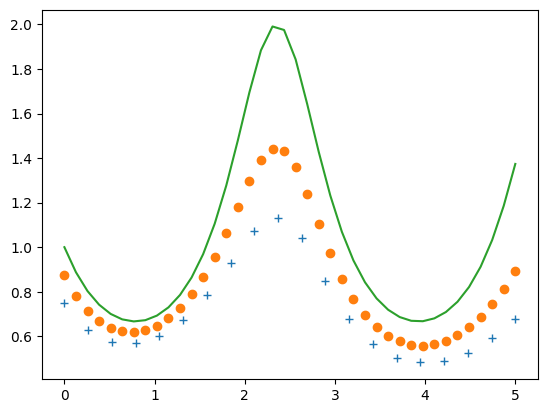

In [4]:
# d) -- Solve IVP to time t_final = 5, first with N1 = 20, then N2 = 40
res_20 = ForwardEuler(0,5,20,1)
res_40 = ForwardEuler(0,5,40,1)

x_axis_20 = np.linspace(start=0, stop=5, num=20)
x_axis_40 = np.linspace(start=0, stop=5, num=40)
plt.plot(x_axis_20, res_20, '+')
plt.plot(x_axis_40, res_40, 'o')
plt.plot(x_axis_40, np.vectorize(ExactVal)(x_axis_40))
plt.show()

In [5]:
# e)
def RK2(t_0, t_final, N, y_0):
    """
    Implements the Runge-Kutta scheme described as
        k_1 = f(t_n,y_n)
        k_2 = f(t_n + 2/3 * h, y_n + 2/3 * h * k_1)
        y_{n+1} = y_n + h (k_1/4 + 3k_2/4)
    """
    y = y_0
    res = []
    h = (t_final - t_0) / N
    for t in range(N):
        t_n = t_0 + t * h
        k_1 = Dynamics(t_n, y)
        k_2 = Dynamics(t_n + 2 / 3 * h, y + 2 / 3 * k_1 * h)

        # y_{n+1} = y_n + h (k_1/4 + 3k_2/4)
        y = y + h * (k_1 / 4 + 3 * k_2 / 4)
        res.append(y)
    #print(res)
    return res

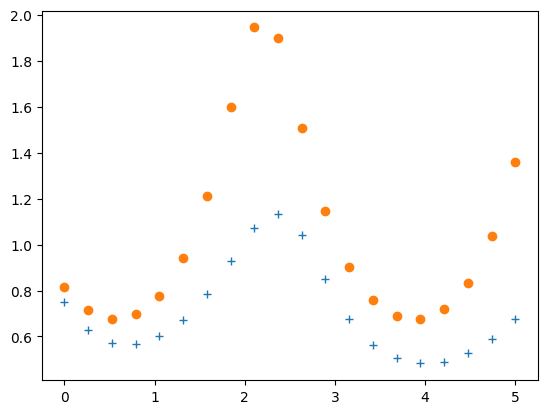

In [6]:
# f)

t_init = 0
t_final = 5

res_20 = ForwardEuler(t_init,t_final,20,1)
res_20_rk = RK2(t_init,t_final,20,1)

x_axis_20 = np.linspace(start=t_init, stop=t_final, num=20)
plt.plot(x_axis_20, res_20, '+')
plt.plot(x_axis_20, res_20_rk, 'o')
plt.show()

In [7]:
# g)
t_final = 2
# Note: check if this is global error definition
actual = ExactVal(t_final)

errors = []
print("Errors:")
for i in range(10):
    N = 5 * 2 ** i
    estimate = ForwardEuler(t_init,t_final=t_final,N=N,y_0=1)[-1] # Get estimate at t_final
    error = actual - estimate
    errors.append(error)

    if i > 0:
        print("-> RATIO with following:",errors[i] / errors[i-1])
    print("Current ERROR @ i =", str(i), ":", error)

Errors:
Current ERROR @ i = 0 : 0.898670396325933
-> RATIO with following: 0.6551789360116611
Current ERROR @ i = 1 : 0.5887899140900026
-> RATIO with following: 0.6150133311951765
Current ERROR @ i = 2 : 0.3621136464386143
-> RATIO with following: 0.5726100346186185
Current ERROR @ i = 3 : 0.20734990762308914
-> RATIO with following: 0.5416231604150923
Current ERROR @ i = 4 : 0.11230551227859498
-> RATIO with following: 0.5224502820641281
Current ERROR @ i = 5 : 0.05867404656730835
-> RATIO with following: 0.511685898594091
Current ERROR @ i = 6 : 0.03002268224194471
-> RATIO with following: 0.5059655959442226
Current ERROR @ i = 7 : 0.015190444312389584
-> RATIO with following: 0.5030144719840365
Current ERROR @ i = 8 : 0.007641013324999557
-> RATIO with following: 0.5015152865546523
Current ERROR @ i = 9 : 0.003832084987255069


As the number of steps increase, the ratio approaches $0.5=\frac{1}{2^1}$, thus the order $p=1$.

In [8]:
# h)
t_final = 2
actual = ExactVal(t_final)

errors = []
print("Errors:")
for i in range(10):
    N = 5 * 2 ** i
    estimate = RK2(t_init,t_final=t_final,N=N,y_0=1)[-1] # Get estimate at t_final
    error = actual - estimate
    errors.append(error)

    if i > 0:
        print("-> Ratio with following:",errors[i] / errors[i-1])
    print("Current error @ i =", str(i), ":", error)

Errors:
Current error @ i = 0 : 0.015373530158846016
-> Ratio with following: 0.6115384255601071
Current error @ i = 1 : 0.009401504428641516
-> Ratio with following: 0.3676611064409784
Current error @ i = 2 : 0.003456567520444098
-> Ratio with following: 0.29339597808790097
Current error @ i = 3 : 0.0010141430084875669
-> Ratio with following: 0.26853332338019714
Current error @ i = 4 : 0.0002723311924519578
-> Ratio with following: 0.25854098841216566
Current error @ i = 5 : 7.040877567199288e-05
-> Ratio with following: 0.2540958440035747
Current error @ i = 6 : 1.789057727963339e-05
-> Ratio with following: 0.2520050210020132
Current error @ i = 7 : 4.508515303092153e-06
-> Ratio with following: 0.25099187489471286
Current error @ i = 8 : 1.131600708914604e-06
-> Ratio with following: 0.2504932880377876
Current error @ i = 9 : 2.8345838232191056e-07


Conversely, the ratio for RK2 gradually approaches 0.25, which is what we would expect from order $p=2$. 